In this notebook, I will compare the performance of loading numpy files vs loading h5 files and converting them to numpy.
If working with numpy files is much faster, then the h5 files should be preprocessed into numpy files

In [7]:
import h5py
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

In [1]:
path = '/nobackup/users/schreurs/project_GAN/dataset_radar'
path_np = path_ds = '/nobackup/users/schreurs/project_GAN/dataset_radar_np'

In [47]:
def load_h5(timestamp):
    path_f = path + '/RAD_NL25_RAC_RT_{}.h5'.format(timestamp)
    try:
        with h5py.File(path_f, 'r') as f:
            rain = f['image1']['image_data'][:]
            # set masked values to 0
            rain[rain == 65535] = 0
            # Expand dimensions from (w,h) to (w,h,c=1)
            rain = np.expand_dims(rain, axis=-1)
    except:
        rain = np.zeros((765,700,1))
    return rain

In [46]:
def load_np(timestamp):
    path_f = path_np + '/{}.npy'.format(timestamp)
    try:
        rain = np.load(path_f)
        # set masked values to 0
        rain[rain == 65535] = 0
        # Expand dimensions from (w,h) to (w,h,c=1)
        rain = np.expand_dims(rain, axis=-1)
    except:
        rain = np.zeros((765,700,1))
    return rain

(765, 700, 1)


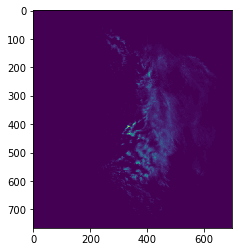

In [20]:
ts = '201903090000'
rdr = load_np(ts)
print(rdr.shape)
plt.imshow(np.squeeze(rdr))

(765, 700, 1)


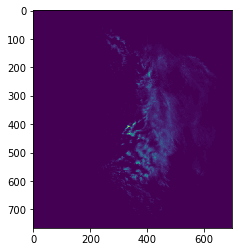

In [21]:
ts = '201903090000'
rdr = load_h5(ts)
print(rdr.shape)
plt.imshow(np.squeeze(rdr))

In [43]:
start_dt = datetime(2019,1,1,0,0)
end_dt =  datetime(2019,12,31,23,55)
dts = np.arange( start_dt,
                end_dt, 
                timedelta(minutes=5)).astype(datetime)
timestamps = ['{:%Y%m%d%H%M}'.format(dt) for dt in dts]
print('Example timestamp: ', timestamps[0], ' Number of timestamps: ', len(timestamps))

Example timestamp:  201901010000  Number of timestamps:  105119


In [48]:
%%timeit
for ts in timestamps:
    load_h5(ts) 

3min 16s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
for ts in timestamps:
    load_np(ts) 